<a name='top'></a>Contents
===
- [Introduction](#intro)

- [Libraries](#libraries)

- [Functions](#functions)

- [Settings](#settings)

- [Dataset](#dataset)
      
- [Exploratory data analysis](#exploratory)
    - [Numerical and Categorical data features](#exploratory_features)
    - [Missing values](#exploratory_missing)
    - [Describe Numerical Data](#exploratory_describe_numerical)
    - [Describe Categorical Data](#exploratory_describe_categorical)
    - [Distribution of Target Variable](#distribution_target)
    - [Distribution of logarithm target variable](#distribution_target_log)
    - [Target distribution by categorical values](#distribution_target_categorical)
        - [Target distribution by cat_price](#distribution_target_catprice)
        - [Target distribution by CatN1](#distribution_target_catn1)
    - [Distribution of numerical features](#distribution_columns)
        - [Skewness and kurtosis of numerical features](#skewness_columns)
        - [Logarithm to numerical features](#logarithm_columns)
    - [Distribution of numerical features with target variable](#relation_numerical_columns)
    - [Distribution of categorical features with target variable](#relation_categorical_columns)
    
    
- [Data wrangling](#data_wrangling)
    - [Correlation](#data_correlation)
        - [Correlation of numerical features to target variable](#data_correlation_numerical_original)
        - [Correlation of categorical features to target variable](#data_correlation_categorical_original)
    - [Feature Selection](#data_feature_selection)
        - [Pearson](#data_pearson)
        - [Random Forest](#data_random_forest)    
        - [LGBMRegressor](#data_LGBMRegressor)
        - [Final Feature Selection](#data_final_feature_selection)
    - [Outliers](#outliers)
    - [Correlation feature selection](#correlation_feature_selection)
    - [Distribution of feature selection with target](#distribution_feature_selection)
    - [Multicollinearity](#multicollinearity)
    - [StandardScaler](#standardscaler)
    - [Grade Percentile of target variable](#grade_percentile_target)
    - [Correlation and Distribution final dataset](#distribution_final_dataset)
    

- [Regression Models](#regression_models)
    - [Data for models](#data_models)
    - [Model application](#application_models)   
        - [KNeighbors Regressor](#knn)
        - [Linear Regression](#mlr)
        - [Ridge](#ridge)
        - [Lasso](#lasso)
        - [Elastic Net](#enet)
        - [SGD Regressor](#sgd)
        - [Decision Tree Regressor](#dtr)
        - [Gradient Boosting Regressor](#gbr)
        - [Random Forest Regressor](#rfr)
    - [Regression Models Results](#comparison)
    - [Feature importance](#Feature importance)



------------------------------------------------------------------------------------------------------
<a name='intro'></a>
# Introduction

EXPLICAR TODO Y PONER FOTO

# RELLENAR!!

PASOS CUBIERTOS
    * DATASET
    * EXPLORATORY DATA ANALYSIS
    * DATA WRANGLING
    * ALGORITHMS

-----------------------------------------------------------------------------------
<a name='libraries'></a>
# Libraries

First of all, it is necessary to import the required libraries to develop all the steps correctly of this notebook.

In [1]:
#import standard libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore
from scipy import stats
%matplotlib inline
sns.set()


#import libraries for data wrangling
import math
import statsmodels.api as sm
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import StandardScaler
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


#import model libraries
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor



#import filter warnings
import warnings
warnings.filterwarnings('ignore')


#display a maximum of 500 columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#set directory of work
path = '/home/miguel/my_project_python/my_project_env/tfm/shopping'
os.chdir(path)

-----------------------------------------------------------------------------------------------
<a name='functions'></a>
# Functions
In this chapter is run the functions used in this notebook.

In [2]:
#print categorical columns
def columns_categorical(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            print('\nColumn Name:', col,)
            print(df[col].value_counts())
            
            
            
#correlation heatmap
def plot_correlation_heatmap(df, number_columns, arg):
    
    #calculate correlation
    corr = df.corr()
    corr_abs = corr.abs()
    columns = corr_abs.nlargest(number_columns, arg)[arg].index
    cont = np.corrcoef(df[columns].values.T)

    #plot values
    plt.figure(figsize = (number_columns, number_columns))
    sns.set(font_scale = 1.5)
    sns.heatmap(cont, linewidths=1.5, annot=True, square=True, fmt='.2f', 
                annot_kws={'size': 10}, yticklabels=columns.values, xticklabels=columns.values)
    
    #show
    plt.show()
    

#pearson selector
def pearson_selector(feature_name, X, y):
    
    #create empty dataframe
    correlation_list = []
    
    #calculate the correlation for for each feature with target variable
    for i in feature_name:
        corr = np.corrcoef(X[i], y)[0, 1]
        correlation_list.append(corr)
        
    #fillna nan values with 0
    correlation_list = [0 if np.isnan(i) else i for i in correlation_list]
    
    #feature correlation
    corr_feature = X.iloc[:,np.argsort(np.abs(correlation_list))[-20:]].columns.tolist()
    
    #asign value
    corr_support = [True if i in corr_feature else False for i in feature_name]
    
    return corr_support, corr_feature


#prove: assing value to column name
def prove(df, col):
    if df[col] == 'Clics':
        df['NEW'] = 'Clic_Imp_CTR'
    elif df[col] == 'Impressions':
        df['NEW'] = 'Clic_Imp_CTR'
    elif df[col] == 'CTR':
        df['NEW'] = 'Clic_Imp_CTR'
    elif df[col] == 'Page':
        df['NEW'] = 'Clic_Imp_CTR'
        
    elif df[col] == 'CatN1':
        df['NEW'] = 'CatN'
    elif df[col] == 'CatN2':
        df['NEW'] = 'CatN'
        
    elif df[col] == 'Cost':
        df['NEW'] = 'Cost_Inc'
    elif df[col] == 'Net':
        df['NEW'] = 'Cost_Inc'
    elif df[col] == 'Ads':
        df['NEW'] = 'Cost_Inc'
        
    elif df[col] == 'Conversions':
        df['NEW'] = 'Conversions'
    elif df[col] == 'All':
        df['NEW'] = 'Conversions'
        
    elif df[col] == 'Cat':
        df['NEW'] = 'Cat_Price'
    elif df[col] == 'CPC':
        df['NEW'] = 'CPC_medio'
    elif df[col] == 'Units':
        df['NEW'] = 'Units_Sold'
    else:
        df['NEW'] = 'ROAS'        
                
    return df['NEW']

-----------------------------------------------------------------------------------------------
<a name='settings'></a>
# Settings

It is established the fixed parameters which will be developed in the notebooK.

In [3]:
#set kurtosis and swekness values
kurt = 2
sw = 2

# set number of cross validations
nr_cv = 5

#number estimators
nr_est = 20

-----------------------------------------------------------------------------------------------
<a name='dataset'></a>
# Dataset

It is opened the dataset of study.

In [4]:
#open the dataset of study
df = pd.read_pickle('./data/final/data_final_ROAS_ADS.pkl')

Check the data

In [5]:
df.head()

,CatN1,CatN2,Cat_Price,CPC_medio,CPC_medio_1w,CPC_medio_2w,CPC_medio_3w,CPC_medio_4w,Impressions,Impressions_1w,Impressions_2w,Impressions_3w,Impressions_4w,Clics,Clics_1w,Clics_2w,Clics_3w,Clics_4w,CTR,CTR_1w,CTR_2w,CTR_3w,CTR_4w,Page_Views,Page_Views_1w,Page_Views_2w,Page_Views_3w,Page_Views_4w,Cost,Cost_1w,Cost_2w,Cost_3w,Cost_4w,Conversions,Conversions_1w,Conversions_2w,Conversions_3w,Conversions_4w,All_Conversions,All_Conversions_1w,All_Conversions_2w,All_Conversions_3w,All_Conversions_4w,Ads_Income,Ads_Income_1w,Ads_Income_2w,Ads_Income_3w,Ads_Income_4w,Ads_Income_All,Ads_Income_All_1w,Ads_Income_All_2w,Ads_Income_All_3w,Ads_Income_All_4w,Net_Incomes,Net_Incomes_1w,Net_Incomes_2w,Net_Incomes_3w,Net_Incomes_4w,Units_sold,Units_sold_1w,Units_sold_2w,Units_sold_3w,Units_sold_4w,ROAS_Ads
136,muebles,"consolas, recibidores y tocadores",200.0,0.26,0.06,0.03,0.02,0.02,39.0,36.71,18.93,12.62,9.46,4.0,0.86,0.43,0.29,0.21,0.102564,0.03,0.02,0.02,0.02,37.0,21.29,21.29,17.71,13.61,1.03,0.20,0.10,0.07,0.05,0.16,0.02,0.01,0.01,0.01,0.16,0.02,0.01,0.01,0.01,24.78,3.54,1.77,1.18,0.88,24.78,3.54,1.77,1.18,0.88,0.0,83.10,115.19,84.58,69.28,0.0,0.57,0.79,0.57,0.46,24.06
172,muebles,"consolas, recibidores y tocadores",200.0,0.26,0.36,0.34,0.34,0.31,451.0,278.00,280.79,235.86,206.50,3.0,1.43,1.79,1.67,1.54,0.006652,0.01,0.01,0.01,0.01,9.0,21.29,16.64,15.95,16.61,0.78,0.61,0.65,0.60,0.52,0.31,0.04,0.02,0.01,0.01,0.31,0.04,0.02,0.01,0.01,62.02,8.86,4.43,2.95,2.22,62.02,8.86,4.43,2.95,2.22,0.0,39.74,50.26,33.51,25.13,0.0,0.29,0.36,0.24,0.18,79.51
186,muebles,"consolas, recibidores y tocadores",200.0,0.30,0.46,0.42,0.41,0.41,824.0,739.00,631.86,500.62,454.07,7.0,5.00,5.14,4.14,3.64,0.008495,0.01,0.01,0.01,0.01,19.0,20.00,16.00,14.19,14.64,2.08,2.30,2.21,1.78,1.59,1.00,0.14,0.07,0.06,0.08,1.00,0.14,0.07,0.06,0.08,277.00,39.57,19.79,14.75,18.64,277.00,39.57,19.79,16.11,19.65,0.0,19.13,33.54,32.93,29.00,0.0,0.14,0.29,0.29,0.25,133.17
203,muebles,"consolas, recibidores y tocadores",200.0,0.39,0.33,0.32,0.37,0.39,1275.0,1144.86,1181.00,1043.95,963.54,6.0,5.57,8.71,7.90,7.36,0.004706,0.00,0.01,0.01,0.01,19.0,11.86,8.57,11.05,12.93,2.34,1.83,3.32,3.20,3.01,0.33,0.05,0.02,0.06,0.05,0.33,0.05,0.02,0.06,0.05,4.97,0.71,0.36,13.43,10.07,4.97,0.71,0.36,13.43,10.07,0.0,0.00,10.51,13.38,10.04,0.0,0.00,0.07,0.10,0.07,2.12
29,muebles,"consolas, recibidores y tocadores",200.0,0.29,0.26,0.26,0.27,0.27,3186.0,3512.00,3512.00,3512.00,3512.00,12.0,14.50,14.50,14.50,14.50,0.003766,0.00,0.00,0.00,0.00,9.0,18.50,18.50,18.50,18.50,3.50,3.95,3.95,3.95,3.95,0.33,0.16,0.16,0.16,0.16,0.33,0.66,0.66,0.66,0.66,58.81,29.40,29.40,29.40,29.40,58.81,29.40,29.40,29.40,29.40,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,16.80


In [6]:
df.shape

(494, 64)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 136 to 204
Data columns (total 64 columns):
CatN1                 494 non-null object
CatN2                 494 non-null object
Cat_Price             494 non-null object
CPC_medio             494 non-null float64
CPC_medio_1w          494 non-null float64
CPC_medio_2w          494 non-null float64
CPC_medio_3w          494 non-null float64
CPC_medio_4w          494 non-null float64
Impressions           494 non-null float64
Impressions_1w        494 non-null float64
Impressions_2w        494 non-null float64
Impressions_3w        494 non-null float64
Impressions_4w        494 non-null float64
Clics                 494 non-null float64
Clics_1w              494 non-null float64
Clics_2w              494 non-null float64
Clics_3w              494 non-null float64
Clics_4w              494 non-null float64
CTR                   494 non-null float64
CTR_1w                494 non-null float64
CTR_2w                494 non-null f

-----------------------------------------------------------------------
<a name='exploratory'></a>
# Exploratory data analysis

In this chapter, it is analyzed the data imported: numerical and categorical features, features distribution, missing values, etc.


<a name='exploratory_features'></a>
## Numerical and Categorical data features

¿How many does numerical and categorical columns contain the dataset?


In [8]:
#number of numerical columns features
numerical_columns = df.dtypes[df.dtypes != 'object'].index
print('Number of NUMERICAL COLUMNS: {} '.format(len(numerical_columns)))

#number of categorical columns features
categorical_columns = df.dtypes[df.dtypes == 'object'].index
print('Number of CATEGORICAL COLUMNS: {} '.format(len(categorical_columns)))

Number of NUMERICAL COLUMNS: 61 
Number of CATEGORICAL COLUMNS: 3 


In [9]:
#names of numerical and categorical columns
print('Numerical columns: {} '.format(df[numerical_columns].columns))
print('-'*228)
print('Categorical columns: {} '.format(df[categorical_columns].columns))

Numerical columns: Index(['CPC_medio', 'CPC_medio_1w', 'CPC_medio_2w', 'CPC_medio_3w',
       'CPC_medio_4w', 'Impressions', 'Impressions_1w', 'Impressions_2w',
       'Impressions_3w', 'Impressions_4w', 'Clics', 'Clics_1w', 'Clics_2w',
       'Clics_3w', 'Clics_4w', 'CTR', 'CTR_1w', 'CTR_2w', 'CTR_3w', 'CTR_4w',
       'Page_Views', 'Page_Views_1w', 'Page_Views_2w', 'Page_Views_3w',
       'Page_Views_4w', 'Cost', 'Cost_1w', 'Cost_2w', 'Cost_3w', 'Cost_4w',
       'Conversions', 'Conversions_1w', 'Conversions_2w', 'Conversions_3w',
       'Conversions_4w', 'All_Conversions', 'All_Conversions_1w',
       'All_Conversions_2w', 'All_Conversions_3w', 'All_Conversions_4w',
       'Ads_Income', 'Ads_Income_1w', 'Ads_Income_2w', 'Ads_Income_3w',
       'Ads_Income_4w', 'Ads_Income_All', 'Ads_Income_All_1w',
       'Ads_Income_All_2w', 'Ads_Income_All_3w', 'Ads_Income_All_4w',
       'Net_Incomes', 'Net_Incomes_1w', 'Net_Incomes_2w', 'Net_Incomes_3w',
       'Net_Incomes_4w', 'Units_sold', 'U

<a name='exploratory_missing'></a>
## Missing values

It is checked if there are missing values in the dataset.

In [10]:
print('Missing values in the dataset: {} '.format(df.isnull().sum().sum()))

Missing values in the dataset: 0 


<a name='exploratory_describe_numerical'></a>
## Describe Numerical Data

Describe the data: count, mean, IQR, etc.


In [11]:
df.describe()

,CPC_medio,CPC_medio_1w,CPC_medio_2w,CPC_medio_3w,CPC_medio_4w,Impressions,Impressions_1w,Impressions_2w,Impressions_3w,Impressions_4w,Clics,Clics_1w,Clics_2w,Clics_3w,Clics_4w,CTR,CTR_1w,CTR_2w,CTR_3w,CTR_4w,Page_Views,Page_Views_1w,Page_Views_2w,Page_Views_3w,Page_Views_4w,Cost,Cost_1w,Cost_2w,Cost_3w,Cost_4w,Conversions,Conversions_1w,Conversions_2w,Conversions_3w,Conversions_4w,All_Conversions,All_Conversions_1w,All_Conversions_2w,All_Conversions_3w,All_Conversions_4w,Ads_Income,Ads_Income_1w,Ads_Income_2w,Ads_Income_3w,Ads_Income_4w,Ads_Income_All,Ads_Income_All_1w,Ads_Income_All_2w,Ads_Income_All_3w,Ads_Income_All_4w,Net_Incomes,Net_Incomes_1w,Net_Incomes_2w,Net_Incomes_3w,Net_Incomes_4w,Units_sold,Units_sold_1w,Units_sold_2w,Units_sold_3w,Units_sold_4w,ROAS_Ads
count,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000,494.000000
mean,0.270364,0.252085,0.241619,0.237065,0.231579,2557.172065,2358.982510,2220.139190,2158.227166,2105.784676,31.973684,28.533806,26.760223,25.817773,24.929291,0.013689,0.013441,0.013340,0.013178,0.012955,43.900810,38.059858,35.716336,34.462713,33.222368,8.191538,7.024069,6.501215,6.265769,6.056660,0.849372,0.316619,0.270911,0.252470,0.233927,1.803988,0.837510,0.766134,0.738968,0.702206,66.261903,20.953846,16.906619,15.415951,14.280911,111.887652,35.724899,27.937794,24.846741,22.419109,39.107004,22.466296,19.930830,18.582389,17.639413,0.951417,0.579231,0.515466,0.485101,0.456943,18.858583
std,0.104756,0.088342,0.085563,0.087765,0.090071,1972.006207,1813.722042,1751.061202,1737.612110,1739.487238,27.291405,23.767561,22.408686,21.777151,21.323389,0.008090,0.005829,0.005402,0.005235,0.005032,37.628701,29.068457,26.833517,25.593281,25.069988,7.305565,5.939428,5.331901,5.120840,4.991351,0.605940,0.272693,0.246635,0.236982,0.226736,1.312097,0.777668,0.741878,0.729667,0.722755,74.279395,18.406402,14.291642,12.968901,12.560410,139.301282,34.569054,24.492646,20.415149,18.527260,59.035413,23.077775,17.532689,15.023434,13.524284,1.227503,0.651504,0.552167,0.507737,0.462568,45.666420
min,0.040000,0.040000,0.030000,0.020000,0.010000,39.000000,36.710000,18.930000,12.620000,9.460000,1.000000,0.860000,0.430000,0.290000,0.210000,0.001515,0.000000,0.000000,0.000000,0.000000,9.000000,1.290000,0.640000,0.430000,0.430000,0.080000,0.160000,0.100000,0.070000,0.050000,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000,0.020000,0.010000,0.010000,0.010000,0.450000,0.060000,0.030000,0.020000,0.020000,0.450000,0.060000,0.030000,0.020000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000
25%,0.200000,0.190000,0.190000,0.180000,0.180000,1192.000000,1092.465000,940.907500,914.992500,912.280000,13.000000,10.860000,10.195000,9.452500,9.245000,0.008349,0.010000,0.010000,0.010000,0.010000,19.000000,17.325000,17.290000,16.502500,15.960000,3.030000,2.700000,2.452500,2.432500,2.350000,0.392500,0.140000,0.080000,0.070000,0.070000,1.000000,0.290000,0.252500,0.230000,0.200000,21.502500,7.700000,6.650000,5.587500,5.442500,30.362500,12.930000,10.345000,9.305000,9.072500,0.000000,6.360000,7.332500,7.080000,7.467500,0.000000,0.140000,0.140000,0.140000,0.140000,3.187500
50%,0.260000,0.250000,0.240000,0.240000,0.240000,2043.000000,1950.355000,1774.285000,1637.785000,1563.555000,24.000000,21.000000,20.325000,19.455000,18.945000,0.012020,0.010000,0.010000,0.010000,0.010000,28.000000,29.43

<a name='exploratory_describe_categorical'></a>
## Describe Categorical Data

It is showed the values of categorical data and theirs frecuency.


In [12]:
#show values of categorical columns
for column in df.columns:
    if df[column].dtype == 'object':
        print('\nColumn Name: {}'.format(column))
        print('{}'.format(df[column].value_counts()))


Column Name: CatN1
muebles                          191
decoración para tu casa          166
organización y almacenamiento     56
decoración de navidad             19
textil hogar                      16
baño                              13
playa y camping                   10
cocina y comedor                   9
lámparas e iluminación             8
jardín y terraza                   6
Name: CatN1, dtype: int64

Column Name: CatN2
espejos de pie y vestidores              83
espejos de pared                         70
consolas, recibidores y tocadores        63
percheros                                56
mesitas de noche                         32
sillas                                   27
mesas de centro y auxiliares             25
cómodas                                  20
belenes y portales de navidad            19
estanterías y librerías                  18
alfombras de bambú                       16
biombos separadores                      12
cenadores y gazebos plegables       

<a name='distribution_target'></a>
## Distribution of target variable

It is studied the distribution of the target variable: 'ROAS'

In [13]:
#set target variable
y = df['ROAS_Ads']

#describe target
y.describe()

count    494.000000
mean      18.858583
std       45.666420
min        0.040000
25%        3.187500
50%        7.230000
75%       17.950000
max      659.170000
Name: ROAS_Ads, dtype: float64

Plot the distribution and display its skewness and kurtosis

Skewness: 8.4
Kurtosis: 94.88


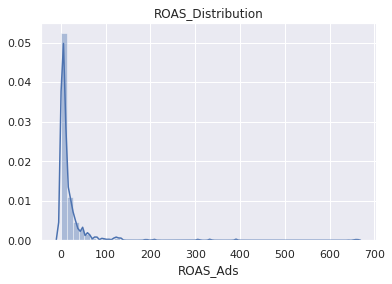

In [14]:
#target distribution
sns.distplot(y).set_title('ROAS_Distribution');

#skewness and kurtosis
print('Skewness: {}'.format(round(y.skew(),2)))
print('Kurtosis: {}'.format(round(y.kurt(),2)))

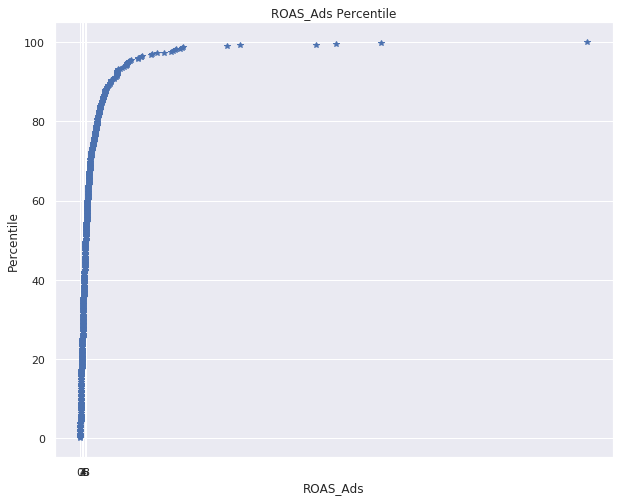

In [15]:
#create percentile
df['percentile'] = df['ROAS_Ads'].apply(lambda x: percentileofscore(df['ROAS_Ads'], x))

# plot percentile
#set size
plt.figure(figsize = (10, 8))

#establish axis
plt.plot(df['ROAS_Ads'], df['percentile'], '*')
plt.xticks(range(0, 10, 2), range(0, 20, 2))

#set labels
plt.xlabel('ROAS_Ads')
plt.ylabel('Percentile')
plt.title('ROAS_Ads Percentile');

In [16]:
print('Score to achieve 50th percentile: {}'.format(round(np.min(df.loc[df['percentile'] > 50, 'ROAS_Ads']),2)))
print('Score to achieve 90th percentile: {}'.format(round(np.min(df.loc[df['percentile'] > 90, 'ROAS_Ads']),2)))

Score to achieve 50th percentile: 7.28
Score to achieve 90th percentile: 40.25


**¿How is the target variable distributed?**
<br>As we can see from the previous graphs, the target feature is not normally distributed. 
<br>Moreover, the values of Skewness and Kurtosis are not close to their recommendable value: 0 (these values should be near to 0 in order to achieve a normal distribution).

**¿How can affect to the regression models?**
<br>Most of machine learning models assumes the data is normally distributed and if it is not achieve this goal: the performance of the machine learning models cab be reduced dractically (for example: linear regression).

**¿How can it be solved?**
<br>It is necessary to apply log transformation to these variable.

<a name='distribution_target_log'></a>
## Distribution of logarithm target variable 
Then, it is applied logarithm neperian to the target variable

Skewness: -0.16
Kurtosis: 0.74


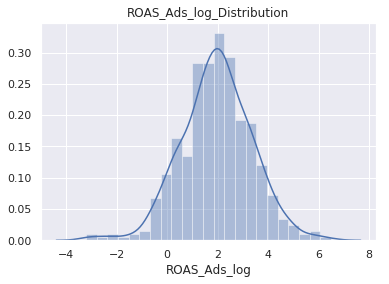

In [17]:
#create log target feature
df['ROAS_Ads_log'] = np.log(df['ROAS_Ads'])

#drop previous target from dataframe
df.drop('ROAS_Ads', axis= 1, inplace=True)

df['ROAS_Ads_log'] = df['ROAS_Ads_log'].replace([np.inf, -np.inf], np.nan)
df['ROAS_Ads_log'].fillna(0, inplace = True)

#set as new target
y = df['ROAS_Ads_log']

#target distribution
sns.distplot(y).set_title('ROAS_Ads_log_Distribution');

#skewness and kurtosis
print('Skewness: {}'.format(round(y.skew(),2)))
print('Kurtosis: {}'.format(round(y.kurt(),2)))

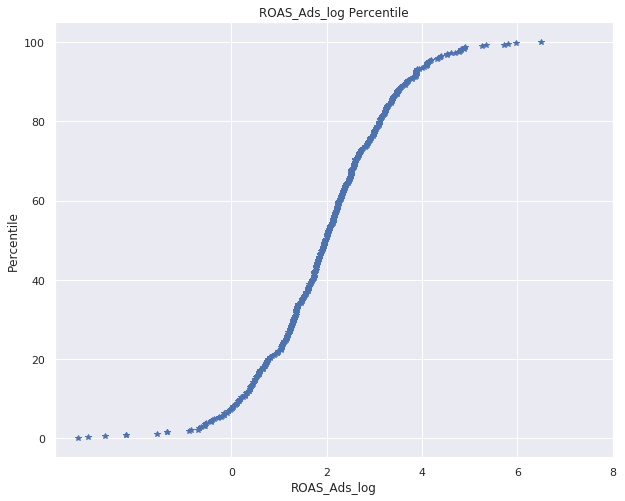

In [18]:
#create percentile
df['percentile'] = df['ROAS_Ads_log'].apply(lambda x: percentileofscore(df['ROAS_Ads_log'], x))

# plot percentile
#set size
plt.figure(figsize = (10, 8))

#establish axis
plt.plot(df['ROAS_Ads_log'], df['percentile'], '*')
plt.xticks(range(0, 10, 2), range(0, 20, 2))

#set labels
plt.xlabel('ROAS_Ads_log')
plt.ylabel('Percentile')
plt.title('ROAS_Ads_log Percentile');

In [19]:
print('Score to achieve 50th percentile: {}'.format(round(np.min(df.loc[df['percentile'] > 50, 'ROAS_Ads_log']),2)))
print('Score to achieve 90th percentile: {}'.format(round(np.min(df.loc[df['percentile'] > 90, 'ROAS_Ads_log']),2)))

Score to achieve 50th percentile: 1.99
Score to achieve 90th percentile: 3.7


**¿How is the new target variable distributed?**
<br>As we can observe in the graph, the new target variable is almost close to a normal distribution with mean equal to 0.
<br>In addtion, the values of Skewness and Kurtosis are currently also closer to their recommended scores.



In [20]:
y.describe()

count    494.000000
mean       1.960826
std        1.398062
min       -3.218876
25%        1.159229
50%        1.978215
75%        2.887522
max        6.490981
Name: ROAS_Ads_log, dtype: float64

<a name='distribution_target_categorical'></a>
## Target distribution by categorical values

In this chapter, it is studied the distribution of the categorical features with the target variable.

<a name='distribution_target_catprice'></a>
### Target distribution by cat_price
Distribution of cat_price with ROAS_log.
<br> In this case it is necessary to apply this feature as categorical type.

In [21]:
#set as categorical
df['Cat_Price'] = pd.Categorical(df.Cat_Price,categories=["20.0", "30.0", "40.0", "50.0", "60.0", "80.0", 
                                                          "100.0", "150.0","200.0", "300.0"], ordered=True)

Plot the boxplot

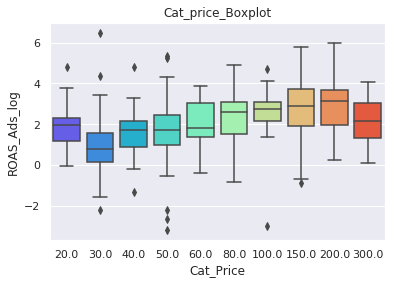

In [22]:
cat_sns1 = sns.boxplot(x='Cat_Price', y='ROAS_Ads_log', data=df, palette='rainbow').set_title('Cat_price_Boxplot')

Plot the violin plot

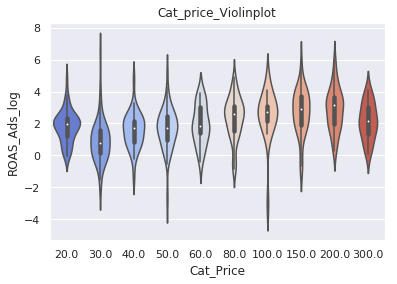

In [23]:
cat_sns2 = sns.violinplot(x='Cat_Price', y='ROAS_Ads_log', data=df, palette='coolwarm').set_title('Cat_price_Violinplot')

As we can observe from these graphs, the distributions per category price are not perfectly normal, but they do not differ a lot from this type of distribution.

<a name='distribution_target_catn1'></a>
### Target distribution by CatN1
Distribution of category N1 with ROAS_log. 

Plot the boxplot

[Text(0, 0, 'muebles'),
 Text(0, 0, 'decoración para tu casa'),
 Text(0, 0, 'organización y almacenamiento'),
 Text(0, 0, 'baño'),
 Text(0, 0, 'textil hogar'),
 Text(0, 0, 'lámparas e iluminación'),
 Text(0, 0, 'cocina y comedor'),
 Text(0, 0, 'decoración de navidad'),
 Text(0, 0, 'jardín y terraza'),
 Text(0, 0, 'playa y camping')]

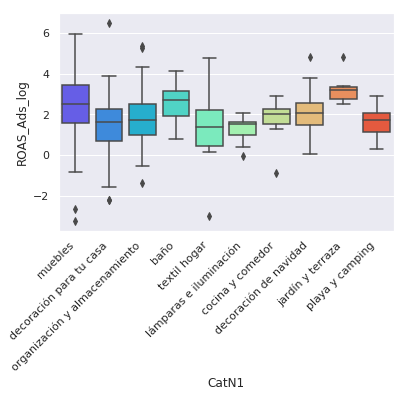

In [23]:
catN1_sns1 = sns.boxplot(x='CatN1', y='ROAS_Ads_log', data=df, palette='rainbow')
catN1_sns1.set_xticklabels(catN1_sns1.get_xticklabels(), rotation=45, ha='right')

Plot the violin plot

[Text(0, 0, 'muebles'),
 Text(0, 0, 'decoración para tu casa'),
 Text(0, 0, 'organización y almacenamiento'),
 Text(0, 0, 'baño'),
 Text(0, 0, 'textil hogar'),
 Text(0, 0, 'lámparas e iluminación'),
 Text(0, 0, 'cocina y comedor'),
 Text(0, 0, 'decoración de navidad'),
 Text(0, 0, 'jardín y terraza'),
 Text(0, 0, 'playa y camping')]

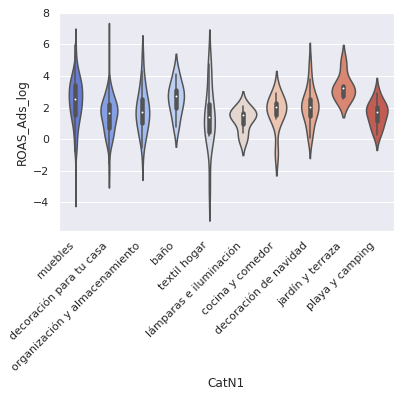

In [24]:
catN1_sns2 = sns.violinplot(x='CatN1', y='ROAS_Ads_log', data=df, palette='coolwarm')
catN1_sns2.set_xticklabels(catN1_sns2.get_xticklabels(), rotation=45, ha='right')

As in the previous case, the distributions are not normal.

<a name='distribution_columns'></a>
## Distribution of numerical features

In this chapter, it is analyzed the distribution of numerical features. 

<br> Moreover, it is considered the skewness and kurtosis in each case in order to apply logarithm if these scores exceeds atypical values.

The upper limit score for skewness and kurtosis is 2 in both cases, these values are considered acceptable in order to prove normal univariate distribution (George & Mallery, 2010; Gravetter & Wallnau, 2014).

<a name='skewness_columns'></a>
### Skewness and kurtosis of numerical features

Calculate the scores per numerical feature


In [25]:
#select index numerical columns
numerical_columns_index = df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'category')].index

#create a dataframe to save skewness and kurtosis values for numerical columns
data = pd.DataFrame([])

for col in numerical_columns_index:
    data = data.append(pd.DataFrame({'Skewness': round(df[col].skew(),2), 
                                     'Kurtosis': round(df[col].kurt(),2)}, 
                                    index=[0]), ignore_index=True)

Select categorical and object columns in order to create a dataframe

In [26]:
#filter numerical columns
numerical_columns_dist = df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'category')]

#create dataframe with the selection
df_columns_dist = pd.DataFrame({'Index':numerical_columns_dist.index, 'Values':numerical_columns_dist.values})

Concatenate with skewness and kurtosis scores with their index of the previous list 

In [27]:
#concat both dataframes by index
df_concat = pd.concat([df_columns_dist['Index'], data], 1)

#show the values
df_concat

,Index,Skewness,Kurtosis
0,CPC_medio,0.78,1.44
1,CPC_medio_1w,0.32,0.72
2,CPC_medio_2w,-0.01,0.09
3,CPC_medio_3w,-0.04,-0.03
4,CPC_medio_4w,-0.15,-0.28
5,Impressions,1.55,3.31
6,Impressions_1w,1.50,2.62
7,Impressions_2w,1.49,2.47
8,Impressions_3w,1.46,2.09
9,Impressions_4w,1.48,1.97


Display a example

Skewness: 2.77
Kurtosis: 9.74


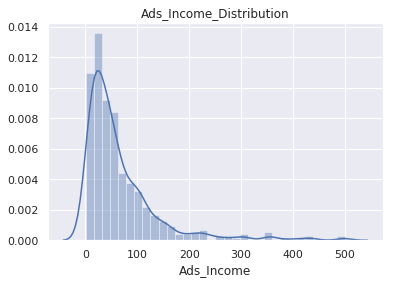

In [28]:
#plot distribution of Ads_Income
sns.distplot(df['Ads_Income']).set_title('Ads_Income_Distribution');

#skewness and kurtosis
print('Skewness: {}'.format(round(df['Ads_Income'].skew(),2)))
print('Kurtosis: {}'.format(round(df['Ads_Income'].kurt(),2)))

The "Ads_Income_Distribution" is not normal with mean 0. It shows a right-skewed (positive skewed) distribution.

Apply a filter for selecting features over fixed values of skewness and kurtosis

In [29]:
#filter columns that not accomplish the requirements
df_log = df_concat[(df_concat['Skewness']>=sw) | (df_concat['Kurtosis']>=kurt)]

#show the selection
df_log

,Index,Skewness,Kurtosis
5,Impressions,1.55,3.31
6,Impressions_1w,1.50,2.62
7,Impressions_2w,1.49,2.47
8,Impressions_3w,1.46,2.09
10,Clics,1.72,3.54
15,CTR,3.53,30.45
20,Page_Views,1.86,4.50
21,Page_Views_1w,1.49,2.00
22,Page_Views_2w,1.49,2.29
23,Page_Views_3w,1.50,2.46


In [30]:
print('{} features achieve the requirements score of skewness and kurtosis'.format(len(df_concat) - len(df_log)))

19 features achieve the requirements score of skewness and kurtosis


<a name='logarithm_columns'></a>
### Logarithm to numerical features

Then, it is necessary to apply logarithm to features that not accomplish the limit score

In [31]:
#apply string to index
lista = df_log['Index'].apply(str)

#create a list
c = lista.values.tolist()

#apply log to the list in order to create new columns and drop prevoius features
for col in c:
    df[col+'_log'] = np.log(df[col])
    df.drop([col], axis= 1, inplace=True)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 136 to 204
Data columns (total 65 columns):
CatN1                     494 non-null object
CatN2                     494 non-null object
Cat_Price                 494 non-null category
CPC_medio                 494 non-null float64
CPC_medio_1w              494 non-null float64
CPC_medio_2w              494 non-null float64
CPC_medio_3w              494 non-null float64
CPC_medio_4w              494 non-null float64
Impressions_4w            494 non-null float64
Clics_1w                  494 non-null float64
Clics_2w                  494 non-null float64
Clics_3w                  494 non-null float64
Clics_4w                  494 non-null float64
CTR_1w                    494 non-null float64
CTR_2w                    494 non-null float64
CTR_3w                    494 non-null float64
CTR_4w                    494 non-null float64
Cost_2w                   494 non-null float64
Cost_3w                   494 non-null float64
C

After applying logarithm to the selected columns, it is shown the new scores of skewness and kurtosis of all columns.

In [33]:
#select index numerical columns
numerical_columns_index_log = df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'category')].index

#create a dataframe to save skewness and kurtosis values for numerical columns
data_log = pd.DataFrame([])

for col in numerical_columns_index_log:
    df[col] = df[col].replace([np.inf, -np.inf], np.nan)
    df[col].fillna(0, inplace = True)
    data_log = data_log.append(pd.DataFrame({'Skewness': round(df[col].skew(),2), 
                                             'Kurtosis': round(df[col].kurt(),2)}, 
                                            index=[0]), ignore_index=True)

#filter numerical columns
numerical_columns_dist_log = df.dtypes[(df.dtypes != 'object') & (df.dtypes != 'category')]

#create dataframe with the selection
df_columns_dist_log = pd.DataFrame({'Index':numerical_columns_dist_log.index, 
                                    'Values':numerical_columns_dist_log.values})    
    
#concat both dataframes by index
df_concat_log = pd.concat([df_columns_dist_log['Index'], data_log], 1)

#show the values
df_concat_log

,Index,Skewness,Kurtosis
0,CPC_medio,0.78,1.44
1,CPC_medio_1w,0.32,0.72
2,CPC_medio_2w,-0.01,0.09
3,CPC_medio_3w,-0.04,-0.03
4,CPC_medio_4w,-0.15,-0.28
5,Impressions_4w,1.48,1.97
6,Clics_1w,1.36,1.44
7,Clics_2w,1.38,1.56
8,Clics_3w,1.37,1.53
9,Clics_4w,1.42,1.73


Display again an example after that change

Skewness: -0.75
Kurtosis: 1.7


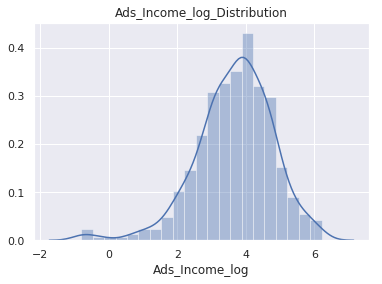

In [34]:
#plot distribution of ROAS_Ads_Ads
sns.distplot(df['Ads_Income_log']).set_title('Ads_Income_log_Distribution');

#skewness and kurtosis
print('Skewness: {}'.format(round(df['Ads_Income_log'].skew(),2)))
print('Kurtosis: {}'.format(round(df['Ads_Income_log'].kurt(),2)))

Now, the Ads_Income_log distribution is closer to a normal distribution.

<a name='relation_numerical_columns'></a>
## Distribution of numerical features with target variable

Show the distribution of the numerical features after applying logarithm to a selected group.


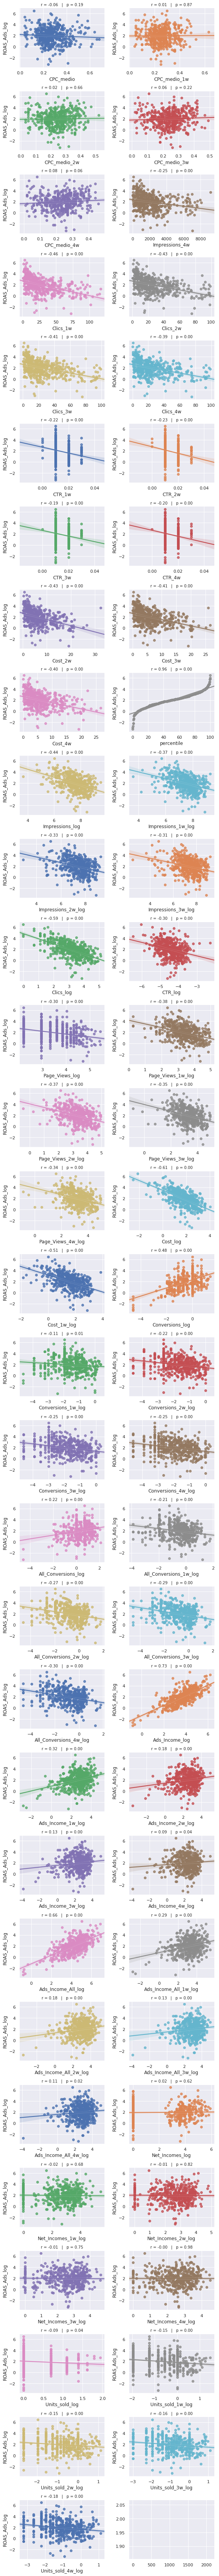

In [35]:
#number of rows and columns
number_rows = 31
number_cols = 2

#set target
y_df = 'ROAS_Ads_log'

#create figure
fig, axs = plt.subplots(number_rows, number_cols, figsize=(number_cols*4,number_rows*3))

#establish parameters
li_not_plot = ['ROAS_Ads_log', 'percentile_log']
li_plot_num_feats = [c for c in list(numerical_columns_index_log) if c not in li_not_plot]

#loop
for r in range(0,number_rows):
    for c in range(0,number_cols):  
        f = r*number_cols + c
        if f < len(li_plot_num_feats):
            sns.regplot(df[li_plot_num_feats[f]], df[y_df], ax = axs[r][c])
            stp = stats.pearsonr(df[li_plot_num_feats[f]], df[y_df])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "   |   " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=10)
            
plt.tight_layout()    
plt.show()

As we can see, majority of these distributions have reduced their kurtosis ans skewness scores and they are almost normal distributions.

<a name='relation_categorical_columns'></a>
## Distribution of categorical features with target variable

In this chapter, it is analyzed the distribution of categorical features with target variable (previosly it was calculated for Cat_Price and CatN1, but not for CatN2)

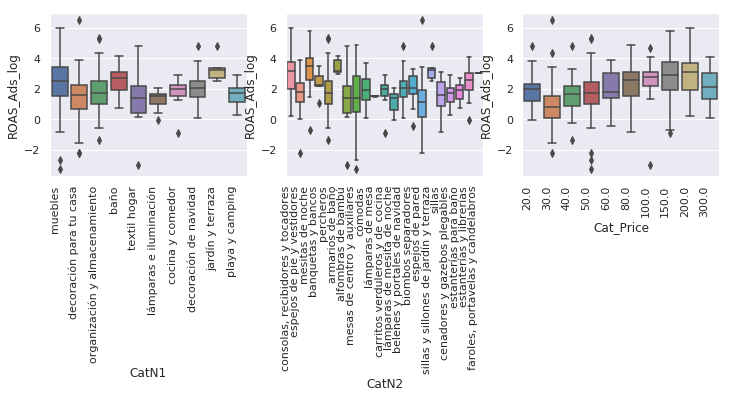

In [36]:
#select categorical columns
categorical_columns_index_log = df.dtypes[(df.dtypes == 'object') | (df.dtypes == 'category')].index

#set number of columns and rows
number_rows = 1
number_cols = 3

#establish target
y_df = 'ROAS_Ads_log'

#set parameters
li_cat_columns = list(categorical_columns_index_log)

#create figure
fig, axs = plt.subplots(number_rows, number_cols, figsize=(number_cols*4,number_rows*3), squeeze=False)

#loop
for r in range(0,number_rows):
    for c in range(0,number_cols):  
        f = r*number_cols + c
        if f < len(li_cat_columns):
            g = sns.boxplot(x = li_cat_columns[f], y = y_df, data = df, ax = axs[r][c])
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha='right')

#show
plt.tight_layout()    
plt.show()

-----------------------------------------------------------------------------------
<a name='data_wrangling'></a>
# Data wrangling

In this whole chapter, it is transformed the data with the purpose of making it more valuable for analytical studies.

<a name='data_correlation'></a>
## Correlation

It is studied the correlation of features with the target variable

<a name='data_correlation_numerical_original'></a>
### Correlation of numerical features to target variable

It is measured the correlation of numerical features to target ROAS_log

In [37]:
#drop percentile column
df.drop('percentile', axis=1, inplace=True)

#correlations of numerical features
df.corr()['ROAS_Ads_log'].sort_values()

Cost_log                 -0.606376
Clics_log                -0.594711
Cost_1w_log              -0.510518
Clics_1w                 -0.457539
Impressions_log          -0.440912
Clics_2w                 -0.429750
Cost_2w                  -0.429559
Cost_3w                  -0.414751
Clics_3w                 -0.408563
Cost_4w                  -0.399172
Clics_4w                 -0.393763
Page_Views_1w_log        -0.377444
Impressions_1w_log       -0.372469
Page_Views_2w_log        -0.370550
Page_Views_3w_log        -0.350757
Page_Views_4w_log        -0.340702
Impressions_2w_log       -0.332849
Impressions_3w_log       -0.307852
CTR_log                  -0.304677
Page_Views_log           -0.301085
All_Conversions_4w_log   -0.297814
All_Conversions_3w_log   -0.290900
All_Conversions_2w_log   -0.270190
Conversions_4w_log       -0.254464
Conversions_3w_log       -0.252898
Impressions_4w           -0.247928
CTR_2w                   -0.228140
Conversions_2w_log       -0.220421
CTR_1w              

<a name='data_correlation_categorical_original'></a>
### Correlation of categorical features to target variable

First of all, it is applied one-hot encoding to the categorical values

In [38]:
#cat price to string
df['Cat_Price'] = df['Cat_Price'].astype(str)

#select categorical columns
df_categorical = df.select_dtypes('object')

#one-hot encoding of these columns
df_categorical = pd.get_dummies(df_categorical, prefix_sep= '_')

#append ROAS_Ads_log to dataframe
df_categorical['ROAS_Ads_log'] = df['ROAS_Ads_log']
df_categorical.head()

,CatN1_baño,CatN1_cocina y comedor,CatN1_decoración de navidad,CatN1_decoración para tu casa,CatN1_jardín y terraza,CatN1_lámparas e iluminación,CatN1_muebles,CatN1_organización y almacenamiento,CatN1_playa y camping,CatN1_textil hogar,CatN2_alfombras de bambú,CatN2_armarios de baño,CatN2_banquetas y bancos,CatN2_belenes y portales de navidad,CatN2_biombos separadores,CatN2_carritos verduleros y de cocina,CatN2_cenadores y gazebos plegables,"CatN2_consolas, recibidores y tocadores",CatN2_cómodas,CatN2_espejos de pared,CatN2_espejos de pie y vestidores,CatN2_estanterías para baño,CatN2_estanterías y librerías,"CatN2_faroles, portavelas y candelabros",CatN2_lámparas de mesa,CatN2_lámparas de mesita de noche,CatN2_mesas de centro y auxiliares,CatN2_mesitas de noche,CatN2_percheros,CatN2_sillas,CatN2_sillas y sillones de jardín y terraza,Cat_Price_100.0,Cat_Price_150.0,Cat_Price_20.0,Cat_Price_200.0,Cat_Price_30.0,Cat_Price_300.0,Cat_Price_40.0,Cat_Price_50.0,Cat_Price_60.0,Cat_Price_80.0,ROAS_Ads_log
136,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3.180551
172,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.375883
186,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,4.891627
203,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.751416
29,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2.821379


It is measured the correlation of categorical features to target ROAS_log

In [39]:
#correlation of categorical features
df_categorical.corr()['ROAS_Ads_log'].sort_values()

Cat_Price_30.0                                -0.280763
CatN2_espejos de pared                        -0.256202
CatN1_decoración para tu casa                 -0.241475
Cat_Price_50.0                                -0.110183
CatN2_sillas                                  -0.090867
CatN2_mesas de centro y auxiliares            -0.085049
Cat_Price_40.0                                -0.078301
CatN2_espejos de pie y vestidores             -0.072267
CatN1_lámparas e iluminación                  -0.065826
CatN2_lámparas de mesita de noche             -0.064418
CatN1_textil hogar                            -0.063652
CatN2_alfombras de bambú                      -0.063652
CatN1_playa y camping                         -0.037479
CatN2_cenadores y gazebos plegables           -0.037479
CatN2_percheros                               -0.034483
CatN1_organización y almacenamiento           -0.034483
Cat_Price_20.0                                -0.030907
CatN1_cocina y comedor                        -0

<a name='data_feature_selection'></a>
## Feature Selection

**Why should it be applied feature selection to this dataset?**
    - Enable to train faster the machine learning models.
    - Reduces complexity and size of the dataset.
    - Improve the key scores of the model: increase accuracy and reduce overfitting.


First of all, it is necessary to make one-hot encoding for categorical features, but in this case, applying and saving the values at the same dataframe as numerical columns.

In [40]:
#one-hot encoding of these columns
df_all = pd.get_dummies(df, prefix_sep = '_')

#columns to list
list_columns = df_all.columns.tolist()
list_columns.remove('ROAS_Ads_log')

#set X and y
X = df_all[list_columns]

y = df_all.ROAS_Ads_log

#X columns to list
feature_name = X.columns.tolist()

<a name='data_pearson'></a>
### Pearson

It is applied Pearson to select features.


In [41]:
#apply pearson function
corr_support, corr_feature = pearson_selector(feature_name, X, y)

#print result
print('The number of selected features is {}'.format(str(len(corr_feature))))

The number of selected features is 20


<a name='data_random_forest'></a>
### Random Forest

It is applied Random Forest to select features.

In [42]:
#apply random forest
embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=15), threshold='3*median')

#fit
embeded_rf_selector.fit(X, y)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False,
        threshold='3*median')

In [43]:
#support
embeded_rf_support = embeded_rf_selector.get_support()

#list
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
#print(str(len(embeded_rf_feature)), 'selected features')

#print result
print('The number of selected features is {}'.format(str(len(embeded_rf_feature))))

The number of selected features is 27


<a name='data_LGBMRegressor'></a>
### LGBMRegressor

It is applied LGBMRegressor to select features.

In [44]:
#apply LGBMRegressor
lgbc= LGBMRegressor(n_estimators=30, learning_rate=0.05, num_leaves=25, colsample_bytree=0.3,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=5)

#set parameters to selector
embeded_lgb_selector = SelectFromModel(lgbc, threshold='10*median')

#fit
embeded_lgb_selector.fit(X, y)

SelectFromModel(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.3,
       importance_type='split', learning_rate=0.05, max_depth=-1,
       min_child_samples=20, min_child_weight=5, min_split_gain=0.01,
       n_estimators=30, n_jobs=-1, num_leaves=25, objective=None,
       random_state=None, reg_alpha=3, reg_lambda=1, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
        max_features=None, norm_order=1, prefit=False,
        threshold='10*median')

In [45]:
#support
embeded_lgb_support = embeded_lgb_selector.get_support()

#list
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()

#print(str(len(embeded_lgb_feature)), 'selected features')
#print result
print('The number of selected features is {}'.format(str(len(embeded_lgb_feature))))

The number of selected features is 12


<a name='data_final_feature_selection'></a>
### Final Feature Selection

Finally, it is concatenate in a dataframe the results of previous models to make a selection.



In [46]:
#all selection in a dataframe
feature_selection = pd.DataFrame({'Feature':feature_name, 
                                  'Pearson':corr_support, 
                                  'Random Forest':embeded_rf_support, 
                                  'LightGBM':embeded_lgb_support})

#count
feature_selection['Total'] = np.sum(feature_selection, axis=1)

#print
feature_selection = feature_selection.sort_values(['Total','Feature'] , ascending=False)
feature_selection.index = range(1, len(feature_selection)+1)
feature_selection

,Feature,Pearson,Random Forest,LightGBM,Total
1,Impressions_log,True,True,True,3
2,Cost_log,True,True,True,3
3,Cost_1w_log,True,True,True,3
4,Conversions_log,True,True,True,3
5,Clics_log,True,True,True,3
6,Ads_Income_log,True,True,True,3
7,Ads_Income_All_log,True,True,True,3
8,Page_Views_3w_log,True,True,False,2
9,Page_Views_2w_log,True,True,False,2
10,Page_Views_1w_log,True,True,False,2


After that, it is filter by a score equal or upper 2 to filter the selected columns

In [47]:
#filter of Total = 2 
columns_select_final = feature_selection [feature_selection['Total'] >= 2]

#select features
columns_selection = columns_select_final['Feature']

#apply to dataframe
df_final = df_all[columns_selection]

#head
df_final.head()

,Impressions_log,Cost_log,Cost_1w_log,Conversions_log,Clics_log,Ads_Income_log,Ads_Income_All_log,Page_Views_3w_log,Page_Views_2w_log,Page_Views_1w_log,Impressions_1w_log,Cost_4w,Cost_3w,Cost_2w,Clics_1w,Ads_Income_All_1w_log,Ads_Income_1w_log
136,3.663562,0.029559,-1.609438,-1.832581,1.386294,3.210037,3.210037,2.874129,3.058237,3.058237,3.603049,0.05,0.07,0.10,0.86,1.264127,1.264127
172,6.111467,-0.248461,-0.494296,-1.171183,1.098612,4.127457,4.127457,2.769459,2.811809,3.058237,5.627621,0.52,0.60,0.65,1.43,2.181547,2.181547
186,6.714171,0.732368,0.832909,0.000000,1.945910,5.624018,5.624018,2.652537,2.772589,2.995732,6.605298,1.59,1.78,2.21,5.00,3.678071,3.678071
203,7.150701,0.850151,0.604316,-1.108663,1.791759,1.603420,1.603420,2.402430,2.148268,2.473171,7.043038,3.01,3.20,3.32,5.57,-0.342490,-0.342490
29,8.066521,1.252763,1.373716,-1.108663,2.484907,4.074312,4.074312,2.917771,2.917771,2.917771,8.163941,3.95,3.95,3.95,14.50,3.380995,3.380995


Check the data

In [48]:
df_final.shape

(494, 17)

In [49]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 136 to 204
Data columns (total 17 columns):
Impressions_log          494 non-null float64
Cost_log                 494 non-null float64
Cost_1w_log              494 non-null float64
Conversions_log          494 non-null float64
Clics_log                494 non-null float64
Ads_Income_log           494 non-null float64
Ads_Income_All_log       494 non-null float64
Page_Views_3w_log        494 non-null float64
Page_Views_2w_log        494 non-null float64
Page_Views_1w_log        494 non-null float64
Impressions_1w_log       494 non-null float64
Cost_4w                  494 non-null float64
Cost_3w                  494 non-null float64
Cost_2w                  494 non-null float64
Clics_1w                 494 non-null float64
Ads_Income_All_1w_log    494 non-null float64
Ads_Income_1w_log        494 non-null float64
dtypes: float64(17)
memory usage: 79.5 KB


<a name='outliers'></a>
## Outliers

Outliers exists in our dataset because of variability of the data.

<br> In this chapter, it is analyzed the IQR values and filter outliers.

In [50]:
#introduce log
df_final['ROAS_Ads_log'] = df['ROAS_Ads_log']
df_final['ROAS_Ads_log'] = y

#index dtypes 
numerical_columns_selection = df_final.dtypes.index

#create empty dataframe
data_IQR = pd.DataFrame([])

#calculate IQR for each feature
for col in numerical_columns_selection:
    Q1 = df_final[col].quantile(0.25)
    Q3 = df_final[col].quantile(0.75)
    data_IQR = data_IQR.append(pd.DataFrame({'IQR': round(Q3 - Q1,2)}, index=[0]), ignore_index=True)

Create a dataframe with index values of the columns

In [52]:
#dictionary dtypes
numerical_columns_selection_final = df_final.dtypes

#dataframe
numerical_columns_selection_final = pd.DataFrame({'Index':numerical_columns_selection_final.index, 
                                    'Values':numerical_columns_selection_final.values})   

Concatenate both dataframes to display IQR values for each feature

In [53]:
#concat dataframes
df_concat_IQR = pd.concat([numerical_columns_selection_final['Index'], data_IQR], 1)
df_concat_IQR

,Index,IQR
0,Impressions_log,1.05
1,Cost_log,1.32
2,Cost_1w_log,1.24
3,Conversions_log,0.94
4,Clics_log,1.17
5,Ads_Income_log,1.37
6,Ads_Income_All_log,1.48
7,Page_Views_3w_log,0.97
8,Page_Views_2w_log,0.98
9,Page_Views_1w_log,1.05


Apply IQR filter to the dataset

In [54]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = round(Q3 - Q1,2)

df_final = df_final[~((df_final < (Q1 - 1.5 * IQR)) | (df_final > (Q3 + 1.5 * IQR))).any(axis=1)]

In [55]:
df_final.shape

(405, 18)

<a name='correlation_feature_selection'></a>
## Correlation feature selection

Measure the correlation of the selected features

In [56]:
df_final.corr()['ROAS_Ads_log'].sort_values()

Clics_log               -0.610883
Cost_log                -0.610800
Cost_1w_log             -0.513528
Clics_1w                -0.460126
Impressions_log         -0.416923
Cost_2w                 -0.397765
Page_Views_1w_log       -0.360005
Cost_3w                 -0.354534
Page_Views_2w_log       -0.350345
Cost_4w                 -0.321503
Impressions_1w_log      -0.317700
Page_Views_3w_log       -0.314014
Ads_Income_All_1w_log    0.236122
Ads_Income_1w_log        0.289761
Conversions_log          0.342022
Ads_Income_All_log       0.601340
Ads_Income_log           0.709729
ROAS_Ads_log             1.000000
Name: ROAS_Ads_log, dtype: float64

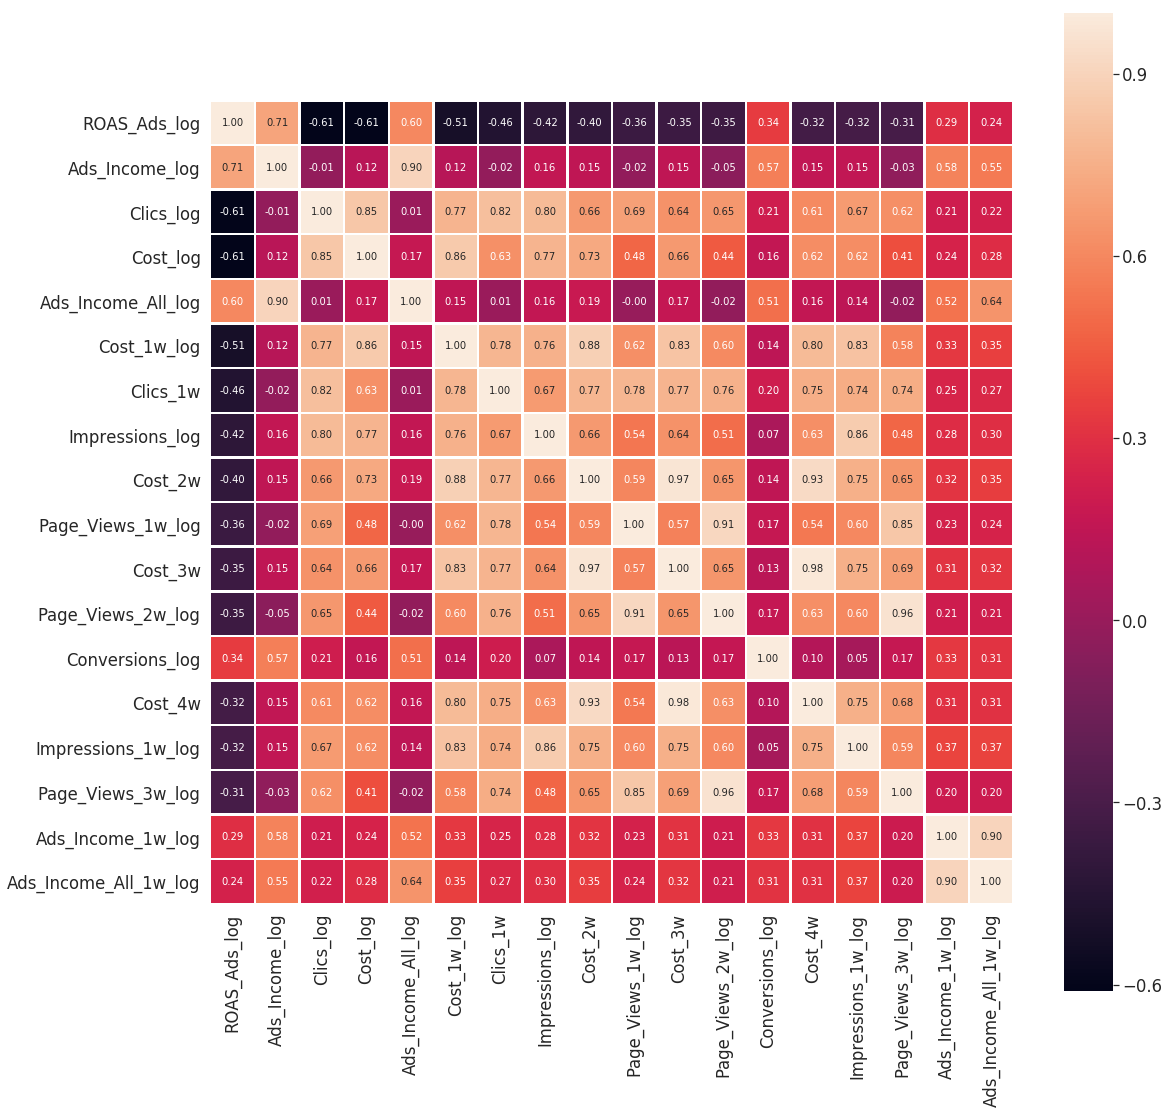

In [57]:
#length columns
number_columns = len(df_final.columns)

#heatmap
plot_correlation_heatmap(df_final, number_columns, "ROAS_Ads_log")

<a name='distribution_feature_selection'></a>
## Distribution of feature selection with target

Distribution of columns with target

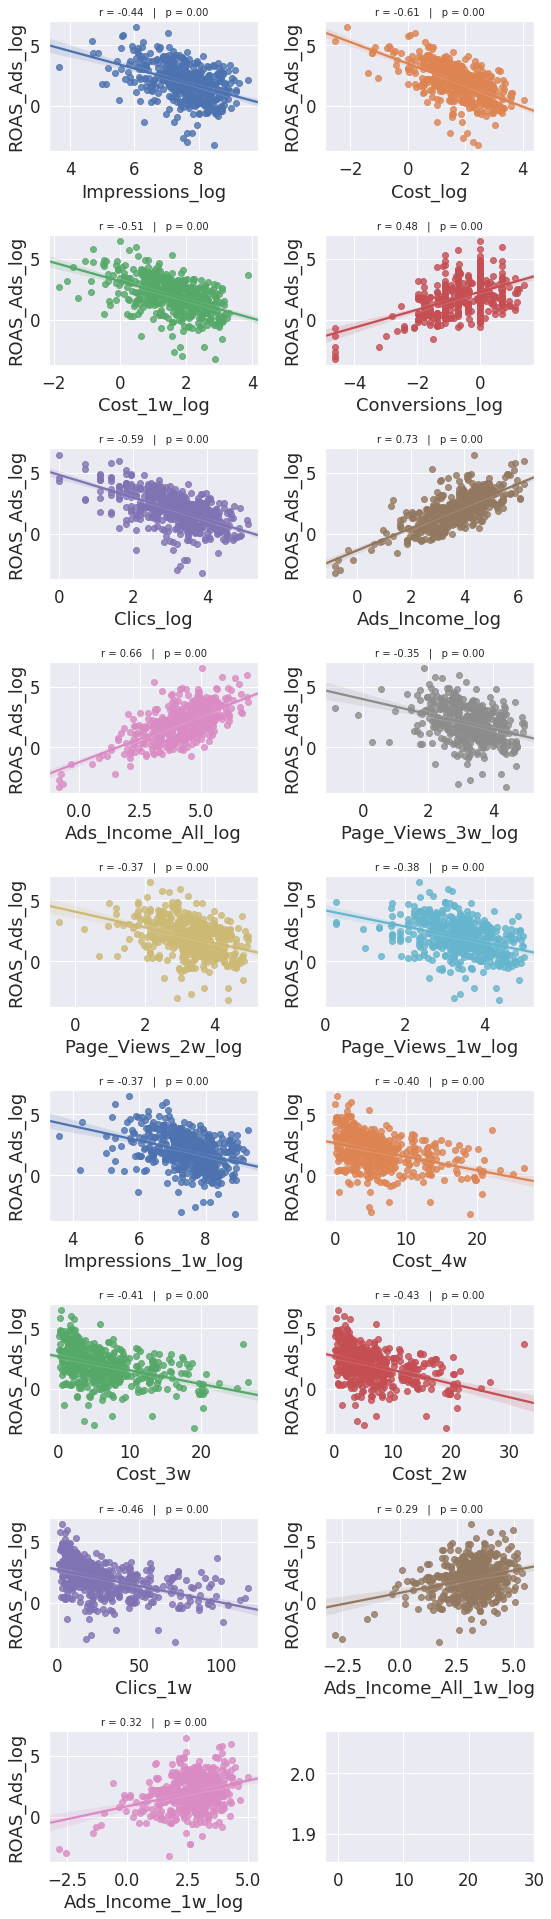

In [58]:
#select index numerical columns
columns_dtypes = df_final.dtypes.index

#number of rows and columns
number_rows = int((number_columns/2))
number_cols = 2

#set target
y_df = 'ROAS_Ads_log'

#create figure
fig, axs = plt.subplots(number_rows, number_cols, figsize=(number_cols*4,number_rows*3))

#establish parameters
li_not_plot = ['ROAS_Ads_log']
li_plot_num_feats = [c for c in list(columns_dtypes) if c not in li_not_plot]

#loop
for r in range(0,number_rows):
    for c in range(0,number_cols):  
        f = r*number_cols + c
        if f < len(li_plot_num_feats):
            sns.regplot(df[li_plot_num_feats[f]], df[y_df], ax = axs[r][c])
            stp = stats.pearsonr(df[li_plot_num_feats[f]], df[y_df])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "   |   " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=10)
            
plt.tight_layout()    
plt.show()

<a name='multicollinearity'></a>
## Multicollinearity

It is measured the multicollinearity between different features to improve accuracy of the regression models.

In [62]:
#save correlation
corr_final = df_final.corr()['ROAS_Ads_log'].sort_values()

#correlation to dataframe
df_corr_final = pd.DataFrame({'Index':corr_final.index, 'Values':abs(corr_final.values)}) 
df_corr_final

#split the index
#df_corr_final[['First', 'Second', 'Third', 'Fourth', 'Fifth']] = df_corr_final['Index'].str.rsplit("_", n = 4, expand=True)
try:
    df_corr_final[['First', 'Second', 'Third', 'Fourth', 'Fift']] = df_corr_final['Index'].str.rsplit("_", 
                                                                                                      n = 4, 
                                                                                                      expand=True)
except:
    df_corr_final[['First', 'Second', 'Third', 'Fourth']] = df_corr_final['Index'].str.rsplit("_", 
                                                                                              n = 3, 
                                                                                              expand=True)

#sort values
df_corr_final = df_corr_final.sort_values(by = 'Values', ascending = False)

#groupby
df_groupby = df_corr_final.groupby('First').first()


#select column
columns_groupby = ['First', 'Index', 'Values']

#display
df_groupby.reset_index(inplace = True)
df_groupby = df_groupby[columns_groupby]


#apply prove function to filter again by similar features defintions
df_groupby['NEW'] = df_groupby.apply(lambda x: prove(x, 'First'), axis=1)

#groupby by the most important value of each group
df_groupby = df_groupby.groupby('NEW').first()

#display
df_groupby

,First,Index,Values
NEW,,,
Clic_Imp_CTR,Clics,Clics_log,0.610883
Conversions,Conversions,Conversions_log,0.342022
Cost_Inc,Ads,Ads_Income_log,0.709729
ROAS,ROAS,ROAS_Ads_log,1.000000


This are the final columns

In [63]:
#save features selected as columns
df_columns_list = df_groupby.Index.values.tolist()

#select columns
df_columns_list

#save data
df_all = df_final[df_columns_list]

Check dataset

In [64]:
df_all.head()

,Clics_log,Conversions_log,Ads_Income_log,ROAS_Ads_log
172,1.098612,-1.171183,4.127457,4.375883
186,1.945910,0.000000,5.624018,4.891627
29,2.484907,-1.108663,4.074312,2.821379
34,3.258097,0.000000,5.087596,3.250374
42,2.564949,-1.966113,3.141563,2.094330


In [65]:
df_all.shape

(405, 4)

In [66]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 172 to 204
Data columns (total 4 columns):
Clics_log          405 non-null float64
Conversions_log    405 non-null float64
Ads_Income_log     405 non-null float64
ROAS_Ads_log       405 non-null float64
dtypes: float64(4)
memory usage: 15.8 KB


It is calculated the VIF

In [67]:
#df_test = df_all
df_test = df_all.drop(['ROAS_Ads_log'], axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df_test.values, i) for i in range(df_test.shape[1])]
vif["features"] = df_test.columns

In [68]:
vif.round(1)

,VIF Factor,features
0,10.1,Clics_log
1,1.2,Conversions_log
2,9.6,Ads_Income_log


These values are right to avoid multicollinearity (Hair et al., 1995)

<a name='standardscaler'></a>
## StandardScaler

**¿Why standarized the dataset?**
<br> It implies to change the range of values so that the distribution standard deviation from the mean equals one. 

In [70]:
#apply standardscaler
sc = StandardScaler()
df_all_sc = sc.fit_transform(df_all)

#final dataset
df_all_sc = pd.DataFrame(df_all_sc)

#rename columns
df_all_sc.columns = df_columns_list

Check the data

In [71]:
df_all_sc.head(5)

,Clics_log,Conversions_log,Ads_Income_log,ROAS_Ads_log
0,-2.648167,-1.135780,0.321937,2.025166
1,-1.546411,0.498260,1.980708,2.481307
2,-0.845545,-1.048551,0.263032,0.650311
3,0.159847,0.498260,1.386145,1.029729
4,-0.741464,-2.244869,-0.770817,0.007285


In [72]:
df_all_sc.shape

(405, 4)

In [73]:
df_all_sc.describe()

,Clics_log,Conversions_log,Ads_Income_log,ROAS_Ads_log
count,4.050000e+02,4.050000e+02,4.050000e+02,4.050000e+02
mean,1.052656e-16,-1.052656e-16,-4.473788e-16,2.456197e-16
std,1.001237e+00,1.001237e+00,1.001237e+00,1.001237e+00
min,-2.648167e+00,-2.244869e+00,-3.050078e+00,-2.342167e+00
25%,-6.451003e-01,-4.688221e-01,-6.895663e-01,-6.736501e-01
50%,5.576582e-02,4.982596e-01,5.167495e-02,-2.262345e-02
75%,6.870798e-01,4.982596e-01,7.346486e-01,7.225604e-01
max,2.562636e+00,2.432423e+00,2.628641e+00,2.798143e+00


<a name='grade_percentile_target'></a>
## Grade Percentile of target variable

Calculate the grade percentile of target variable

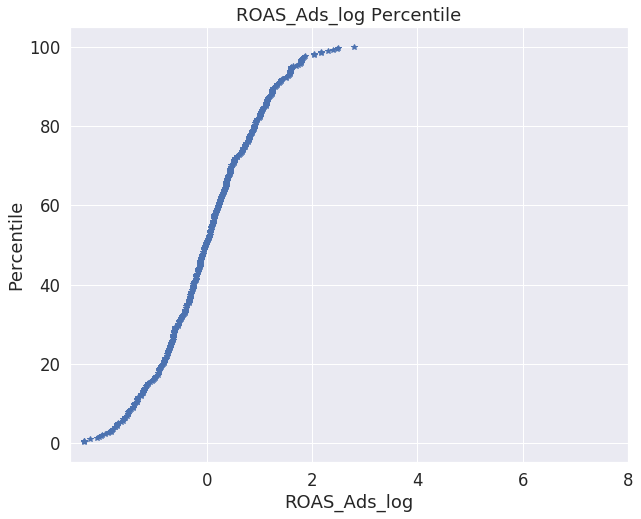

In [74]:
#create percentile
df_all_sc['percentile'] = df_all_sc['ROAS_Ads_log'].apply(lambda x: percentileofscore(df_all_sc['ROAS_Ads_log'], x))

# plot percentile
#set size
plt.figure(figsize = (10, 8))

#establish axis
plt.plot(df_all_sc['ROAS_Ads_log'], df_all_sc['percentile'], '*')
plt.xticks(range(0, 10, 2), range(0, 20, 2))

#set labels
plt.xlabel('ROAS_Ads_log')
plt.ylabel('Percentile')
plt.title('ROAS_Ads_log Percentile');

In [75]:
print('50th percentile: {}'.format(round(np.min(df_all_sc.loc[df_all_sc['percentile'] > 50, 'ROAS_Ads_log']),2)))
print('90th percentile: {}'.format(round(np.min(df_all_sc.loc[df_all_sc['percentile'] > 90, 'ROAS_Ads_log']),2)))

50th percentile: -0.02
90th percentile: 1.3


<a name='distribution_final_dataset'></a>
## Correlation and Distribution final dataset

Correlation and distribution of the final selected features with the target

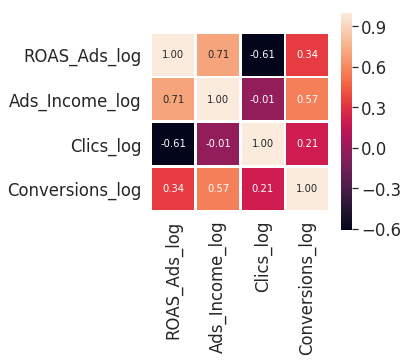

In [76]:
#remove percentile feature
df_all_sc.drop('percentile', axis=1, inplace=True)

#length columns
number_columns = len(df_all_sc.columns)

#heatmap
plot_correlation_heatmap(df_all_sc, number_columns, "ROAS_Ads_log")

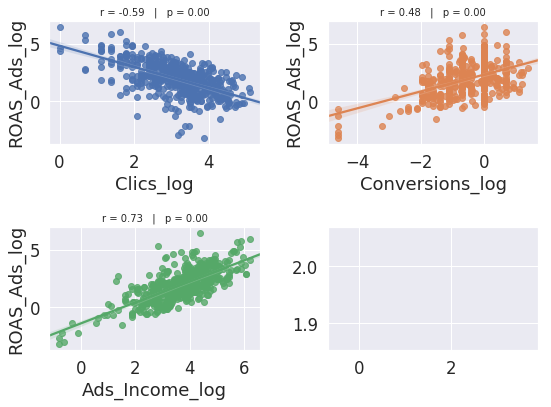

In [77]:
#select index numerical columns
columns_dtypes = df_all_sc.dtypes.index

#number of rows and columns
number_rows = int((number_columns/2))
number_cols = 2

#set target
y_df = 'ROAS_Ads_log'

#create figure
fig, axs = plt.subplots(number_rows, number_cols, figsize=(number_cols*4,number_rows*3))

#establish parameters
li_not_plot = ['ROAS_Ads_log']
li_plot_num_feats = [c for c in list(columns_dtypes) if c not in li_not_plot]

#loop
for r in range(0,number_rows):
    for c in range(0,number_cols):  
        f = r*number_cols + c
        if f < len(li_plot_num_feats):
            sns.regplot(df[li_plot_num_feats[f]], df[y_df], ax = axs[r][c])
            stp = stats.pearsonr(df[li_plot_num_feats[f]], df[y_df])
            str_title = "r = " + "{0:.2f}".format(stp[0]) + "   |   " "p = " + "{0:.2f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=10)
            
plt.tight_layout()    
plt.show()

<a name='regression_models'></a>
# Regression Models

It is analyzed all the data selected with regression models:
    - LinearRegression
    - KNN Regressor
    - Ridge
    - Lasso
    - Elastic Net
    - SGDRegressor
    - Gradient Boosting Descent
    - Decision Tree Regressor
    - Random Forest Regressor
    
The selected scores to measure the results are:
    - MAE
    - RMSE
    - R_squared

<a name='data_models'></a>
## Data for models
Select data for the regression models

In [79]:
#to list
df_regression_columns = df_all_sc.columns.tolist()

#create X variable
X = df_all_sc[df_regression_columns]

#drop ROAS_Ads from X
#remove percentile feature
X.drop('ROAS_Ads_log', axis=1, inplace=True)


#create y variable
y = df_all_sc['ROAS_Ads_log']

In [80]:
X.head()

,Clics_log,Conversions_log,Ads_Income_log
0,-2.648167,-1.135780,0.321937
1,-1.546411,0.498260,1.980708
2,-0.845545,-1.048551,0.263032
3,0.159847,0.498260,1.386145
4,-0.741464,-2.244869,-0.770817


Target variable

In [81]:
y.head()

0    2.025166
1    2.481307
2    0.650311
3    1.029729
4    0.007285
Name: ROAS_Ads_log, dtype: float64

In [82]:
y.describe()

count    4.050000e+02
mean     2.456197e-16
std      1.001237e+00
min     -2.342167e+00
25%     -6.736501e-01
50%     -2.262345e-02
75%      7.225604e-01
max      2.798143e+00
Name: ROAS_Ads_log, dtype: float64

<a name='application_models'></a>
## Model application
Apply models to the dataset

Name scores

In [83]:
score_calc = 'neg_mean_squared_error'
scoring = {'abs_error': 'neg_mean_absolute_error', 'squared_error': 'neg_mean_squared_error', 'rsquared':'r2'}

<a name='knn'></a>
### KNeighbors Regressor

It is applied KNeighbors Regressor

In [84]:
#apply grid search
reg_knn_gs = GridSearchCV(KNeighborsRegressor(),
            param_grid = {"n_neighbors":np.arange(4,100)},
            cv = nr_cv,
            scoring = score_calc)
    
#fit
reg_knn_gs.fit(X,y)
    
#get best params
knn_best_params = reg_knn_gs.best_params_.get('n_neighbors')
    
#apply knn to best params
reg_knn = KNeighborsRegressor(n_neighbors = knn_best_params)
    
#cross validation
scores = cross_validate(reg_knn, X, y, cv = nr_cv, scoring = scoring, return_train_score = True)
    
#saves scores
knn_mae = abs(scores['test_abs_error'].mean())
knn_rmse = math.sqrt(abs(scores['test_squared_error'].mean()))
knn_r2 = abs(scores['test_rsquared'].mean())

<a name='mlr'></a>
### Linear Regression

It is applied Linear Regression

In [85]:
#apply linear regression with grid search
linreg = LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(linreg, parameters, cv = nr_cv, verbose = 1 , scoring = score_calc)

#fit
grid_linear.fit(X, y)

#get best params
#mlr_best_params = grid_linear.best_params_

#aply linear regression with best params
reg_mlr = LinearRegression(grid_linear.best_params_)

#cross validation
scores_mlr = cross_validate(reg_mlr, X, y, cv = nr_cv, scoring = scoring, return_train_score = True)

#saves scores
mlr_mae = abs(scores_mlr['test_abs_error'].mean())
mlr_rmse = math.sqrt(abs(scores_mlr['test_squared_error'].mean()))
mlr_r2 = abs(scores_mlr['test_rsquared'].mean())

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.5s finished


<a name='ridge'></a>
### Ridge

It is applied Ridge

In [86]:
#apply ridge with grid search 
ridge = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1], 'normalize':[True,False], 'tol':[1e-06,5e-06,1e-05,5e-05]}
grid_ridge = GridSearchCV(ridge, parameters, cv= nr_cv, verbose = 1, scoring = score_calc)

#fit
grid_ridge.fit(X, y)

#save best params values as list
ridge_best_params_list = list(grid_ridge.best_params_.values())

##apply ridge with best params
ridge_best_params = Ridge(alpha = ridge_best_params_list[0], 
                          normalize = ridge_best_params_list[1], 
                          tol= ridge_best_params_list[2])

#cross validation
scores_ridge = cross_validate(ridge_best_params, X, y, cv = nr_cv, scoring = scoring, return_train_score = True)

#save scores
ridge_mae = abs(scores_ridge['test_abs_error'].mean())
ridge_rmse = math.sqrt(abs(scores_ridge['test_squared_error'].mean()))
ridge_r2 = abs(scores_ridge['test_rsquared'].mean())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.5s finished


<a name='lasso'></a>
### Lasso

It is applied Lasso

In [87]:
#apply lasso with grid search
lasso = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1], 
              'normalize':[True,False], 
              'tol':[1e-06,1e-05,5e-05,1e-04,5e-04,1e-03]}
grid_lasso = GridSearchCV(lasso, parameters, cv=5, verbose=1, scoring = score_calc)

#fit
grid_lasso.fit(X, y)

#save best params values as list
lasso_best_params_list = list(grid_lasso.best_params_.values())

#apply lasso with best params
reg_lasso = Lasso(alpha= lasso_best_params_list[0], 
                  normalize= lasso_best_params_list[1],
                  tol= lasso_best_params_list[2])

#cross validation
scores_lasso = cross_validate(reg_lasso, X, y, cv = nr_cv, scoring = scoring, return_train_score = True)

#save scores
lasso_mae = abs(scores_lasso['test_abs_error'].mean())
lasso_rmse = math.sqrt(abs(scores_lasso['test_squared_error'].mean()))
lasso_r2 = abs(scores_lasso['test_rsquared'].mean())

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    2.1s finished


<a name='enet'></a>
### Elastic Net

It is applied Elastic Net

In [88]:
#apply elastic net with grid search 
enet = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'max_iter' :[1000000], 'l1_ratio':[0.04,0.05], 
              'fit_intercept' : [False,True], 'normalize':[True,False], 'tol':[1e-02,1e-03,1e-04]}
grid_enet = GridSearchCV(enet, parameters, cv = nr_cv, verbose = 1, scoring = score_calc)

#fit
grid_enet.fit(X, y)

#save best params as list
enet_best_params_list = list(grid_enet.best_params_.values())


#apply enet with best params
enet_best_params = ElasticNet(alpha = enet_best_params_list[0], 
                              fit_intercept= enet_best_params_list[1], 
                              l1_ratio= enet_best_params_list[2], 
                              max_iter= enet_best_params_list[3], 
                              normalize= enet_best_params_list[4],
                              tol= enet_best_params_list[5])

#cross validation
scores_enet = cross_validate(enet_best_params, X, y, cv = nr_cv, scoring = scoring, return_train_score = True)

#saves scores
enet_mae = abs(scores_enet['test_abs_error'].mean())
enet_rmse = math.sqrt(abs(scores_enet['test_squared_error'].mean()))
enet_r2 = abs(scores_enet['test_rsquared'].mean())

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    2.1s finished


<a name='sgd'></a>
### SGD Regressor

It is applied SGD Regressor

In [89]:
#apply sgd regressor with grid search
sgd = SGDRegressor()
parameters = {'max_iter' :[1000], 'alpha':[1e-05], 'epsilon':[1e-02], 'fit_intercept' : [True]}
grid_sgd = GridSearchCV(sgd, parameters, cv = nr_cv, verbose = 1, scoring = score_calc)

#fit
grid_sgd.fit(X, y)

#save best params values as list
sgd_best_params_list = list(grid_sgd.best_params_.values())

#apply best params to sgd
sgd = SGDRegressor(alpha = sgd_best_params_list[0], 
                   epsilon = sgd_best_params_list[1], 
                   fit_intercept = sgd_best_params_list[2], 
                   max_iter = sgd_best_params_list[3])

#cross validation
scores_sgd = cross_validate(sgd, X, y, cv = nr_cv, scoring = scoring, return_train_score = True)

#save scores
sgd_mae = abs(scores_sgd['test_abs_error'].mean())
sgd_rmse = math.sqrt(abs(scores_sgd['test_squared_error'].mean()))
sgd_r2 = abs(scores_sgd['test_rsquared'].mean())

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.6s finished


<a name='dtr'></a>
### Decision Tree Regressor

It is applied Decision Tree Regressor

In [90]:
#apply decision tree with grid search
reg_dtr = GridSearchCV(DecisionTreeRegressor(),
                  param_grid = {"max_depth":np.arange(2,8),
                              "min_samples_leaf":[10,30,50,100]},
                  cv = nr_cv,
                  scoring = "neg_mean_absolute_error")

#fit
reg_dtr.fit(X,y)

#save best params values as a list
dtr_best_params = list(reg_dtr.best_params_.values())

#apply decision tree with best params
reg_dtr = DecisionTreeRegressor(max_depth = dtr_best_params[0], min_samples_leaf = dtr_best_params[1])

#cross validation
scores_dtr = cross_validate(reg_dtr, X, y, cv = nr_cv, scoring = scoring, return_train_score = True)

#saves scores
dtr_mae = abs(scores_dtr['test_abs_error'].mean())
dtr_rmse = math.sqrt(abs(scores_dtr['test_squared_error'].mean()))
dtr_r2 = abs(scores_dtr['test_rsquared'].mean())

<a name='gbr'></a>
### Gradient Boosting Regressor

It is applied Gradient Boosting Regressor

In [91]:
#apply gradient boosting regressor with gird search
reg_gbr = GridSearchCV(GradientBoostingRegressor(n_estimators = nr_est),
                  param_grid = {"max_depth":np.arange(2,10),
                             "learning_rate":np.arange(1,10)/10},
                  scoring = "neg_mean_absolute_error",
                  cv = nr_cv)

#fit
reg_gbr.fit(X,y)

#save best params values as list
gbr_best_params_list = list(reg_gbr.best_params_.values())

#apply gradient boosting regressor with best params
gbr_best_params = GradientBoostingRegressor(max_depth = gbr_best_params_list[1], 
                                            n_estimators= nr_est,
                                            learning_rate = gbr_best_params_list[0])

#cross validation
scores_gbr = cross_validate(gbr_best_params, X, y, cv=5, scoring=scoring, return_train_score=True)

#saves scores
gbr_mae = abs(scores_gbr['test_abs_error'].mean())
gbr_rmse = math.sqrt(abs(scores_gbr['test_squared_error'].mean()))
gbr_r2 = abs(scores_gbr['test_rsquared'].mean())

<a name='rfr'></a>
### Random Forest Regressor

It is applied Random Forest Regressor

In [92]:
#apply random forest regressor with grid search
param_grid = {'min_samples_split' : [3,4,6,10], 'n_estimators' : [20,50], 'random_state': [5] }
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, refit=True, verbose=1, scoring = score_calc)

#fit
grid_rf.fit(X, y)

#save best params values as list
rfr_best_params_list = list(grid_rf.best_params_.values())

#apply random forest regressor with best params
rfr_best_params = RandomForestRegressor(min_samples_split = rfr_best_params_list[0], 
                                        n_estimators = rfr_best_params_list[1], 
                                        random_state = rfr_best_params_list[2])

#cross validation
scores_rfr = cross_validate(rfr_best_params, X, y, cv = nr_cv, scoring = scoring, return_train_score = True)

#save scores
rfr_mae = abs(scores_rfr['test_abs_error'].mean())
rfr_rmse = math.sqrt(abs(scores_rfr['test_squared_error'].mean()))
rfr_r2 = abs(scores_rfr['test_rsquared'].mean())

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.4s finished


<a name='comparison'></a>
## Regression Models Results

Display the final results

In [93]:
#list mae
list_mae = [knn_mae, mlr_mae, dtr_mae, gbr_mae,lasso_mae, ridge_mae, enet_mae, sgd_mae, rfr_mae]

#list rmse
list_rmse = [knn_rmse, mlr_rmse, dtr_rmse, gbr_rmse,lasso_rmse, ridge_rmse, enet_rmse,sgd_rmse,rfr_rmse]

#list r squared
list_r2 = [knn_r2, mlr_r2, dtr_r2, gbr_r2,lasso_r2, ridge_r2, enet_r2,sgd_r2,rfr_r2]

#define regressors
list_regressors = ['KNN Regressor','Linear Regression', 'Ridge', 'Lasso', 'ElaNet', 'SGD Regressor', 
                   'DecisionTree Regressor', 'GradientBoosting Regressor', 'RandomForest']

Plot results

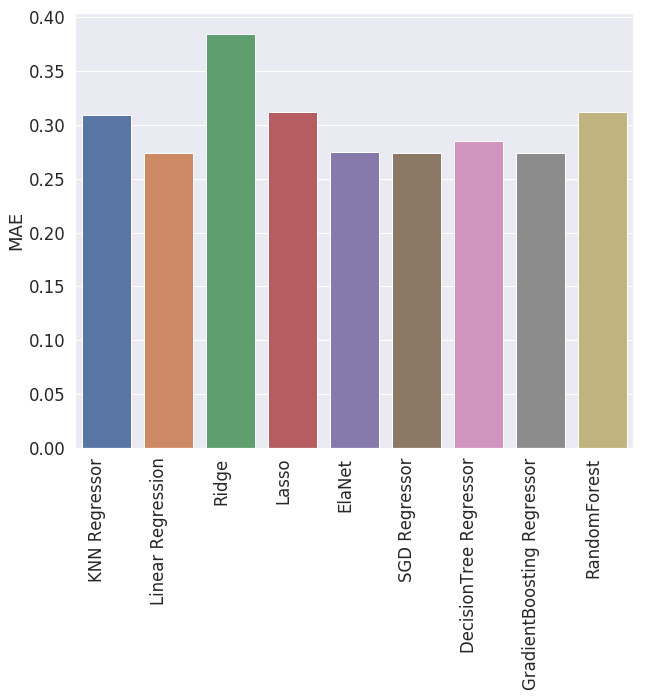

In [94]:
#plot mae 
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
mae_plot = sns.barplot(x = list_regressors, y = list_mae, ax = ax)
mae_plot.set_xticklabels(mae_plot.get_xticklabels(), rotation = 90, ha='right')
plt.ylabel('MAE')
plt.show()

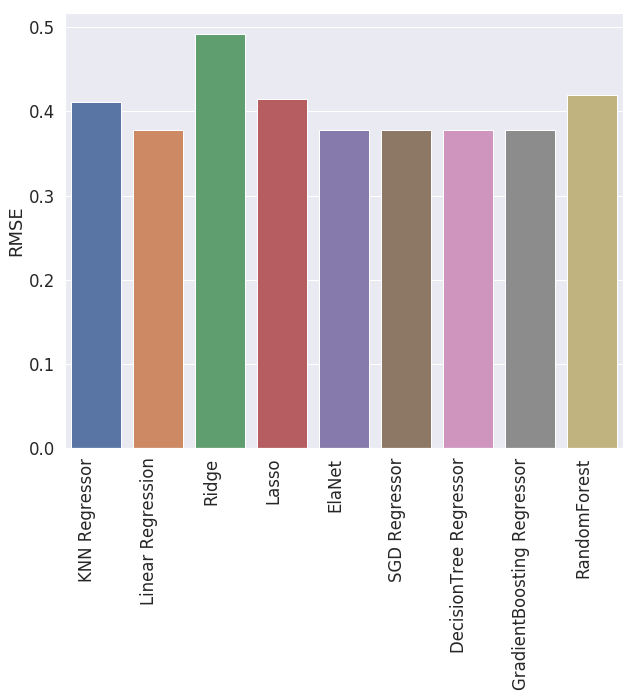

In [95]:
#plot rmse 
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
rmse_plot = sns.barplot(x = list_regressors, y = list_rmse, ax = ax)
rmse_plot.set_xticklabels(rmse_plot.get_xticklabels(), rotation = 90, ha='right')
plt.ylabel('RMSE')
plt.show()

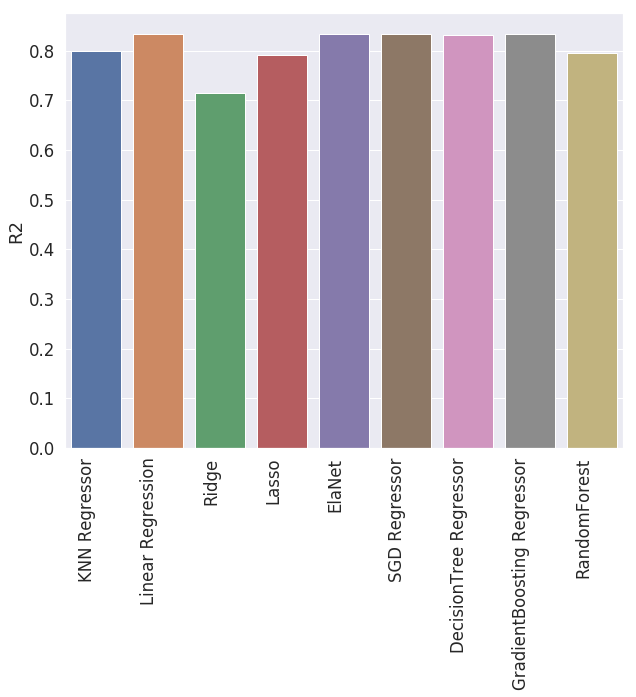

In [96]:
#plot r squared
fig, ax = plt.subplots()
fig.set_size_inches(10,8)
r2_plot = sns.barplot(x = list_regressors, y = list_r2, ax = ax)
r2_plot.set_xticklabels(r2_plot.get_xticklabels(), rotation = 90, ha='right')
plt.ylabel('R2')
plt.show()

In [97]:
df_scores = pd.DataFrame(
    {'Index': list_regressors,
     'MAE': list_mae,
     'RMSE': list_rmse,
     'R2': list_r2
    })

df_scores['MAE'] = df_scores['MAE'].apply(lambda x: round(x,3))
df_scores['RMSE'] = df_scores['RMSE'].apply(lambda x: round(x,3))
df_scores['R2'] = df_scores['R2'].apply(lambda x: round(x,3))

df_scores.set_index('Index')

,MAE,RMSE,R2
Index,,,
KNN Regressor,0.309,0.411,0.800
Linear Regression,0.274,0.378,0.834
Ridge,0.384,0.492,0.714
Lasso,0.311,0.414,0.792
ElaNet,0.275,0.378,0.833
SGD Regressor,0.274,0.378,0.834
DecisionTree Regressor,0.285,0.378,0.832
GradientBoosting Regressor,0.274,0.378,0.834
RandomForest,0.312,0.419,0.796


<a name='feature_importance'></a>
## Feature importance
It is analyzed the feature importance of the features

In [176]:
rfr_best_params.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=6,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

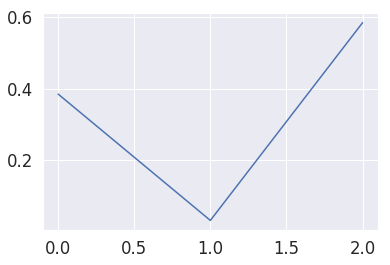

In [177]:
plt.plot(rfr_best_params.feature_importances_)

In [123]:
X.columns[rfr_best_params.feature_importances_>0.01]

Index(['CPC_medio', 'Clics_log', 'Conversions_log', 'Ads_Income_log',
       'Page_Views_1w_log'],
      dtype='object')

In [ ]:
# feature importance de categorias
# lo mismo con rolling y sin rolloing